**6.4** Build intuition on equispaced vs Chebyshev nodes by plotting the cardinal polynomials for n = 10. What do you observe regarding their magnitude?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from math import sqrt
from scipy.special import factorial
from sympy import integrate, init_printing
init_printing(use_latex="mathjax")
from scipy.special import kv
import cmath
from math import sqrt, pi, factorial, exp

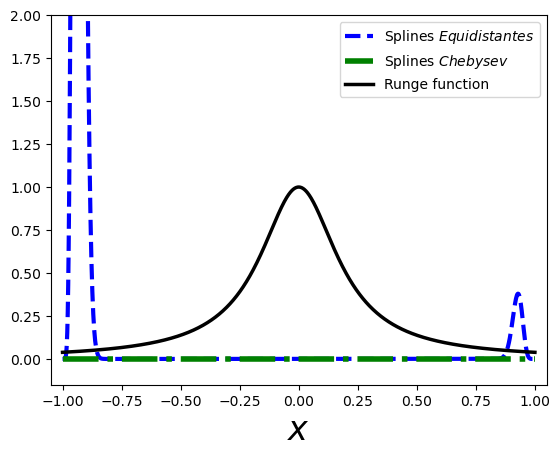

In [59]:
def f(x):
      return 1/(1 + 25*x**2)

def generatedata(n,f,nodes="cheb"): 
    if nodes=="cheb":
        dataxs = -np.cos(np.linspace(0,np.pi,n)) 
    else:
        dataxs = np.linspace(-1,1,n)
    datays = f(dataxs)
    return dataxs, datays

def weights(dataxs):
      n = dataxs.size
      ws = np.ones(n)
      for k in range(n):
           for j in range(n):
                if j == k:
                    continue
                ws[k] *= (dataxs[k]-dataxs[j])
      return 1/ws

def numerador(x,dataxs):
    n=len(dataxs)
    nume=np.ones(n)
    for k in range(n):
        for j in range(n):
            if j==k:
                continue
            nume[k]*=(x-dataxs[j])
    return nume

def lk(x,dataxs,datays,n):
    nume=numerador(x,dataxs)
    w=weights(dataxs)
    l=np.ones(n-1)
    lk=1
    c=np.multiply(w, nume)
    for i in range(n-1):
        lk*=c[i]
    return lk

def pol(x,dataxs,datays):
    lag=list(map(lambda x,y,z:x*y*z,numerador(x,dataxs),weights(dataxs),datays))
    suma=sum(lag)
    return suma
    
def plotting():
    plt.xlabel('$x$', fontsize=24)

    n = 10
    dataxs, datays = generatedata(n, f, "equi")
    interpxsA = np.linspace(-1,1,100*n)
    interpysA = [lk(x,dataxs, datays,n) for x in interpxsA] 
    plt.plot(interpxsA, interpysA, 'b--', label='Splines $Equidistantes$', linewidth=3)

    n = 10
    dataxs, datays = generatedata(n, f, "cheb")
    interpxsB = np.linspace(-1,1,100*n)
    interpysB = [lk(x,dataxs, datays, n) for x in interpxsB] 
    plt.plot(interpxsB, interpysB, 'g-.', label='Splines $Chebysev$', linewidth=4)
    plt.plot(interpxsB, f(interpxsB), 'k-', label='Runge function', linewidth=2.5)
    
    plt.legend(loc=1)

    plt.xlim(-1.05, 1.05)
    plt.ylim(-0.15, 2)
    plt.show()

if __name__ == '__main__':
    plotting()



In [67]:
n = 10
dataxs, datays = generatedata(n, f, "cheb")
x= numerador(0.5,dataxs)
d=weights(dataxs)
print(x,d)
lk(-0.99,dataxs,datays,n)

[-3.90312782e-18 -4.06662620e-18 -4.62439669e-18 -5.85469173e-18
 -8.69102289e-18 -1.79398163e-17 -3.51562500e-02  2.20064425e-17
  1.33154196e-17  1.17093835e-17] [-14.22222222  28.44444444 -28.44444444  28.44444444 -28.44444444
  28.44444444 -28.44444444  28.44444444 -28.44444444  14.22222222]


7.207978225089991e-14

**6.7** We know from Eq. (6.38) that the error of the interpolant at the point x is proportional to the node polynomial value Eq. (6.24) at that point. In problem 6.8 we formally show that Chebyshev nodes minimize the maximum value of the node polynomial. Here you should plot L(x) for n = 7 and n = 15 for the two choices of equidistant and Chebyshev nodes and draw the corresponding conclusions.

**6.13** The method of piecewise-linear interpolation is essentially an application of Lagrange interpolation in each panel, this time not to the second derivative, as in Eq. (6.67), but to the function itself. Specifically, we have:

$sk_{−1,k}(x) = y_{k−1} \cfrac{x_k − x}{x_k − x_{k−1}} + yk \cfrac{x − x_{k−1}}{x_k − x_{k−1}}  $

where this is to be interpreted as in Eq. (6.51). A moment’s attention will highlight that this expression is nothing but Eq. (6.70) where we have dropped all the c terms Implement this in Python for Runge’s function, for n = 15 and n = 150.


0.3 0.2592750581841138 0.3076923076923077


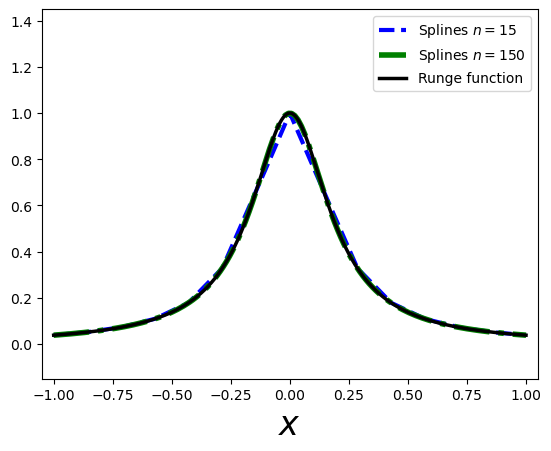

In [4]:
from math import sqrt, pi
def f(x):
    return 1/(1 + 25*x**2)

def generatedata(n,f,nodes="cheb"):
    if nodes=="cheb":
        dataxs = -np.cos(np.linspace(0,np.pi,n))
    else:
        dataxs = np.linspace(-1,1,n)
    datays = f(dataxs)
    return dataxs, datays

def weights(dataxs):
    n = dataxs.size
    ws = np.ones(n)
    for k in range(n):
        for j in range(n):
            if j == k:
                continue
            ws[k] *= (dataxs[k]-dataxs[j])
    return 1/ws

def bary(dataxs,datays,ws,x):
    k = np.where(x == dataxs)[0]
    if k.size == 0:
        nume = np.sum(ws*datays/(x-dataxs))
        denom = np.sum(ws/(x-dataxs))
        val = nume/denom
    else:
        val = datays[k[0]]
    return val

if __name__ == '__main__':
    dataxs, datays = generatedata(15, f)
    ws = weights(dataxs)
    x = 0.3; pofx = bary(dataxs, datays, ws, x)
    print(x, pofx, f(x))

def linsplin(dataxs,datays,x):
    k = np.argmax(dataxs>x)
    xk = dataxs[k]; xk1 = dataxs[k-1]
    yk = datays[k]; yk1 = datays[k-1]

    val = yk1*(xk-x)/(xk-xk1) + yk*(x-xk1)/(xk-xk1)
    return val

def plotting():
    plt.xlabel('$x$', fontsize=24)

    n = 15
    dataxs, datays = generatedata(n, f, "equi")
    interpxsA = np.linspace(-1,1,100*n)
    interpysA = [linsplin(dataxs, datays, x) for x in interpxsA] 
    plt.plot(interpxsA, interpysA, 'b--', label='Splines $n=15$', linewidth=3)

    n = 150
    dataxs, datays = generatedata(n, f, "equi")
    interpxsB = np.linspace(-1,1,100*n)
    interpysB = [linsplin(dataxs, datays, x) for x in interpxsB] 
    plt.plot(interpxsB, interpysB, 'g-.', label='Splines $n=150$', linewidth=4)

    plt.plot(interpxsB, f(interpxsB), 'k-', label='Runge function', linewidth=2.5)

    plt.legend(loc=1)

    plt.xlim(-1.05, 1.05)
    plt.ylim(-0.15, 1.45)
    plt.show()

if __name__ == '__main__':
    plotting()